# See 'ML_Metabolomics_Crohns_Disease/data_preprocessing_and_eda/preprocess_eda_notebook.ipynb' for the preceding data preprocessing and EDA steps.

# LIBRARIES, FUNCTIONS and DATA

### Importing essetial python libraries

In [2]:
import pandas as pd              # for data wrangling and data manipulation
import matplotlib.pyplot as plt  # for visualisation
import numpy as np               # for numerical python and working with arrays
 
# svm lib, and SVC (in case I made a mistake somewhere and wrote only SVC instead of svm.SVC)
from sklearn import svm
from sklearn.svm import SVC

# spliting and testing the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# for permutation and cross-validation
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedKFold

# for permutation feature importance
from sklearn.inspection import permutation_importance



# Scikit-learn to build machine learning models to assign disease states to samples based on their GC-MS chromatograms.

# SUPPORT VECTOR MACHINES

### This section was initially disorganised, as the process of building and testing the best model involved a trial-and-error approach to ultimately determine the optimal strategy. In the final version presented below, the sections have been restructured to reflect the correct, intuitive workflow. However, this revised structure may not fully capture the exploratory phase of the process.

## Initial Evaluation of Sample Types(blood, breath, faecal, urine) to identify which one provides the best results for distinguishing CD from CTRL.

# Blood

Mean Accuracy: 0.4494 ± 0.1367


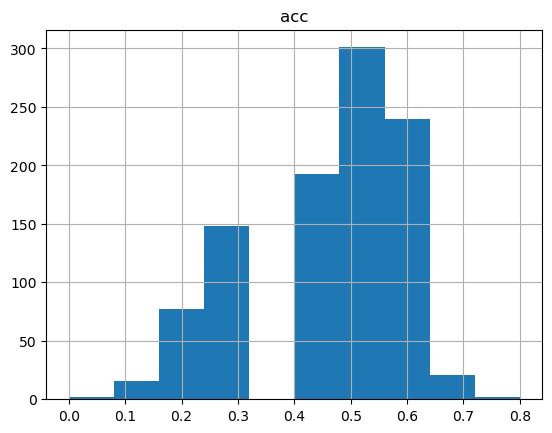

In [138]:
######################################################
## Data split into into features (X) and labels (y) ##
######################################################

y = bl_sample_type        # Disease state
X = bl_df.T.iloc[:, :-1]  # Features with shape (23, 4349)

###################
## Bootstrapping ##
###################

accuracies = []  # List to store accuracy for each iteration

# Performing 1000 iterations with random train-test splits
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # SPLIT 30/70
    # Initialise and train the SVM classifier
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    # Predict on the test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Making a dataframe for the accuracies from the bootstrapping
acc = pd.DataFrame({"acc":accuracies})

############
# Plotting #
############

acc.hist()

# Calculating a mean and std for accuracies for comparsion
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Printing results
print(f'Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')

# Breath

Mean Accuracy: 0.4187 ± 0.1062


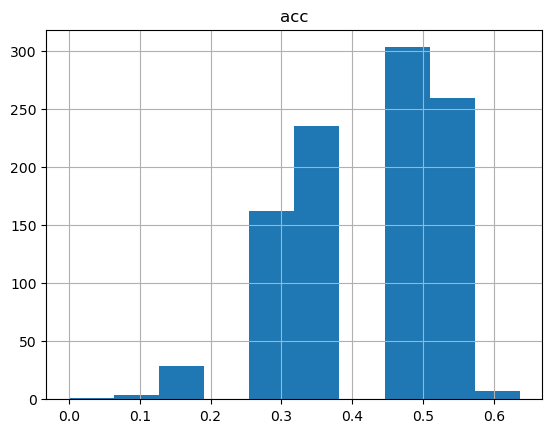

In [140]:
######################################################
## Data split into into features (X) and labels (y) ##
######################################################

y = br_sample_type        # Disease state
X = br_df.T.iloc[:, :-1]  # Features with shape (23, 4349)

###################
## Bootstrapping ##
###################

accuracies = []  # List to store accuracy for each iteration

# Performing 1000 iterations with random train-test splits
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # SPLIT 30/70
    # Initialise and train the SVM classifier
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    # Predict on the test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Making a dataframe for the accuracies from the bootstrapping
acc = pd.DataFrame({"acc":accuracies})

############
# Plotting #
############

acc.hist()

# Calculating a mean and std for accuracies for comparsion
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Printing results
print(f'Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')

# Faeces

Mean Accuracy: 0.6761 ± 0.1844


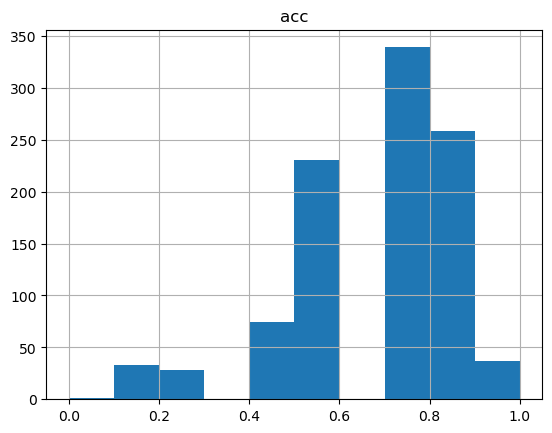

In [142]:
######################################################
## Data split into into features (X) and labels (y) ##
######################################################

y = fa_sample_type        # Disease state
X = fa_df.T.iloc[:, :-1]  # Features with shape (23, 4349)

###################
## Bootstrapping ##
###################

accuracies = []  # List to store accuracy for each iteration

# Performing 1000 iterations with random train-test splits
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # SPLIT 30/70
    # Initialise and train the SVM classifier
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    # Predict on the test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Making a dataframe for the accuracies from the bootstrapping
acc = pd.DataFrame({"acc":accuracies})

############
# Plotting #
############

acc.hist()

# Calculating a mean and std for accuracies for comparsion
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Printing results
print(f'Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')

# Urine

Mean Accuracy: 0.6121 ± 0.1540


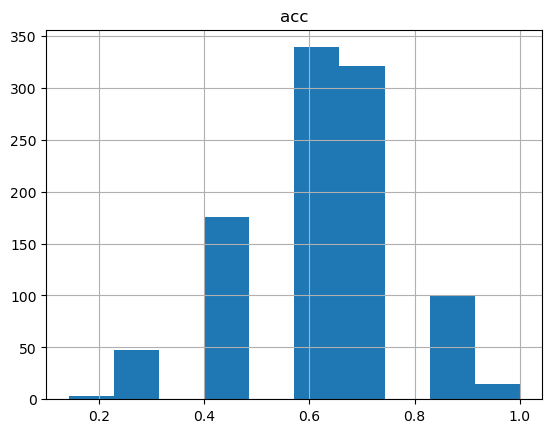

In [144]:
######################################################
## Data split into into features (X) and labels (y) ##
######################################################

y = ur_sample_type        # Disease state
X = ur_df.T.iloc[:, :-1]  # Features with shape (23, 4349)

###################
## Bootstrapping ##
###################

accuracies = []  # List to store accuracy for each iteration

# Performing 1000 iterations with random train-test splits
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # SPLIT 30/70
    # Initialise and train the SVM classifier
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    # Predict on the test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Making a dataframe for the accuracies from the bootstrapping
acc = pd.DataFrame({"acc":accuracies})

############
# Plotting #
############

acc.hist()

# Calculating a mean and std for accuracies for comparsion
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Printing results
print(f'Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')

# Selecting the Best Sample Type

## SINCE THE BEST MEAN ACCURACY WAS RECORDED FOR THE FAECAL SAMPLE TYPE (Mean Accuracy: 0.6757 ± 0.1828), ONLY THIS SAMPLE TYPE WILL BE USED TO BUILD THE FINAL MODEL

Please note that some code refinements in this section were made with the help of ChatGPT to expedite the process, improve the organisation of the code, and enhance the formatting (of the print function) for better readability.

OpenAI. (2024). ChatGPT (Dec 2024) https://openai.com/chatgpt

# Hyperparameter Tuning and Kernel Selection

Testing kernel: linear
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for linear kernel: {'C': 0.01, 'gamma': 1e-05}
Best model accuracy for linear kernel on training data: 1.0
Cross-validation scores for linear kernel: [0.8  0.8  0.6  1.   0.75]
Average cross-validation score for linear kernel: 0.79


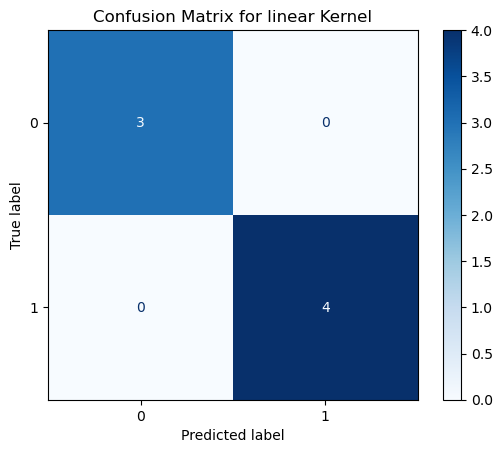

Testing kernel: poly
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for poly kernel: {'C': 0.01, 'gamma': 0.001}
Best model accuracy for poly kernel on training data: 1.0
Cross-validation scores for poly kernel: [0.8  1.   0.2  1.   0.75]
Average cross-validation score for poly kernel: 0.75


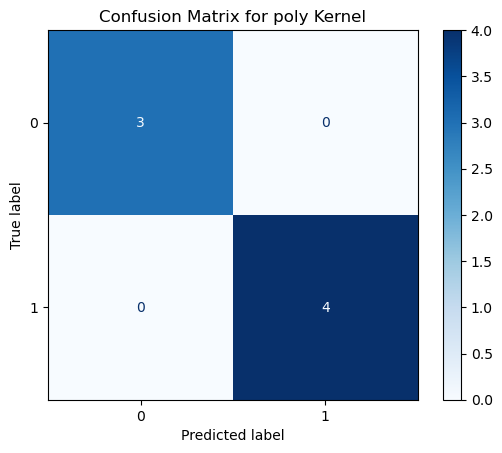

Testing kernel: rbf
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for rbf kernel: {'C': 1, 'gamma': 0.0001}
Best model accuracy for rbf kernel on training data: 1.0
Cross-validation scores for rbf kernel: [0.8  0.8  0.6  1.   0.75]
Average cross-validation score for rbf kernel: 0.79


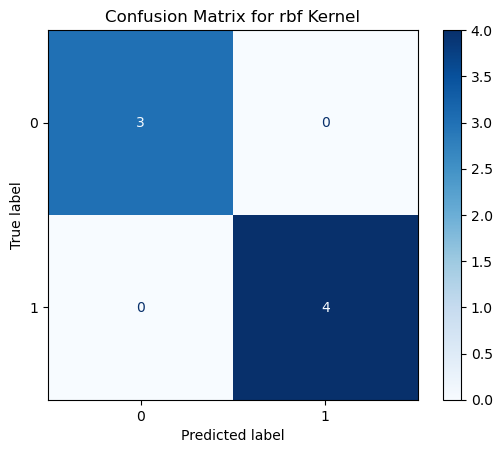

Testing kernel: sigmoid
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for sigmoid kernel: {'C': 1, 'gamma': 0.0001}
Best model accuracy for sigmoid kernel on training data: 0.8695652173913043
Cross-validation scores for sigmoid kernel: [1.   0.8  0.8  1.   0.75]
Average cross-validation score for sigmoid kernel: 0.8699999999999999


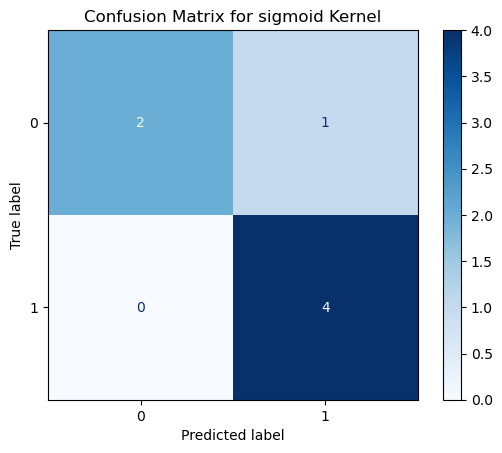

In [211]:

# Definining the kernels I want to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to store best models for each kernel
best_models = {}

# Hyperparameter grid (C and gamma) to tune
param_grid = {
    'C': [0.01, 0.01, 0.1, 1, 10, 100],  # Various values of C
    'gamma': [0.00001, 0.0001, 0.001, 0.1, 0.1, 1]  # Various values of gamma
}

# Loop over the different kernels and perform GridSearchCV
for kernel in kernels:
    print(f"Testing kernel: {kernel}")
    
    # Initialise the SVM classifier with the current kernel
    clf = SVC(kernel=kernel)
    
    # Use GridSearchCV to find the best parameters for the current kernel
    # param_grid= specifies the hyperparameters to test param_grid is a dictionary where the keys are hyperparameter names, and the values are lists of values 
    # cv=5 5-fold cross-validation, which splits the data into 5 subsets (or "folds") 
    # The model is trained on 4 of these folds and tested on the remaining fold, repeating the process 5 times
    # verbose= controls the amount of information displayed during the execution of GridSearchCV
    # verbose=1 shows a basic progress of the search
    # n_jobs=-1 means using all available CPU cores for parallel processing
    
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    
    # Store the best model for this kernel
    best_models[kernel] = grid_search.best_estimator_
    
    # Print the best parameters found by GridSearchCV
    print(f"Best parameters for {kernel} kernel: {grid_search.best_params_}")
    
    # Get the best model and fit it
    best_svm = grid_search.best_estimator_
    
    # Print the accuracy of the best model on the training data
    print(f"Best model accuracy for {kernel} kernel on training data: {best_svm.score(X, y)}")
    
    # Evaluate the performance of the best model using cross-validation
    cv_scores = cross_val_score(best_svm, X, y, cv=5)  # 5-fold cross-validation
    print(f"Cross-validation scores for {kernel} kernel: {cv_scores}")
    print(f"Average cross-validation score for {kernel} kernel: {cv_scores.mean()}")
    
    # Fitting the best svm hyperparameters and kernel with our test data
    y_pred_test = best_svm.predict(X_test)
    
    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.show()


# Final Model Performance

In [156]:
# Defining the feature set (X) and disease state (y)
X = fa_df.T.iloc[:, :-1]  # Features with shape (23, 4349)
y = fa_sample_type  # disease state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit and predict using SVM
clf = SVC(kernel='rbf', C=1, gamma=0.0001)
clf.fit(X_train, y_train)


SVC(C=1, gamma=0.0001)

In [867]:
clf.score(X_test, y_test)

0.8571428571428571

In [624]:
# Defining the feature set (X) and disease state (y)
X = fa_df.T.iloc[:, :-1]  # Features with shape (23, 4349)
y = fa_sample_type  # disease state

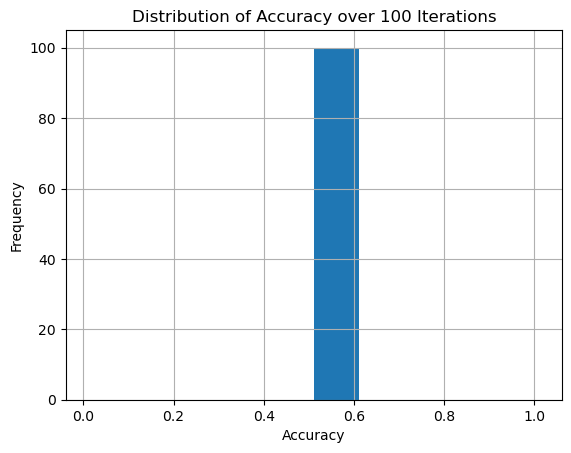

[0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111, 0.5111111111111111,

In [626]:
# Split the data into training and testing sets for final evaluation,random_state=42 for reproduction of the results 


clf = SVC(kernel='rbf', C=1, gamma=0.001)
clf.fit(X, y)

accuracies = []  # List to store accuracy for each iteration
for i in range(100):
    clf = SVC(kernel='rbf', C=1, gamma=0.001)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
# Convert accuracies to a DataFrame and plot the distribution
acc = pd.DataFrame({"acc": accuracies})
acc.hist()
plt.title('Distribution of Accuracy over 100 Iterations')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


# Calculating a mean and std for accuracies for comparsion
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Printing results
print(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')


Test set accuracy: 0.5111111111111111


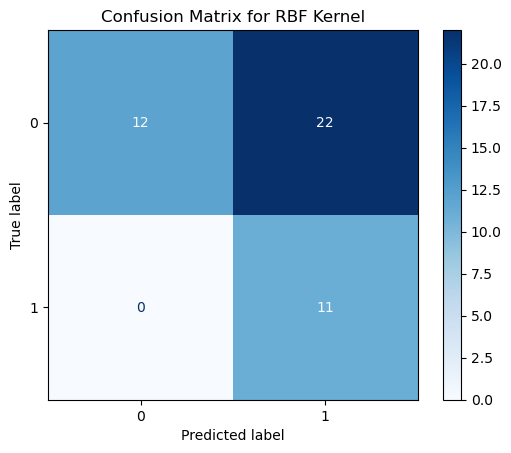

In [628]:
# Test set accuracy
test_accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for RBF Kernel")
# Save and display the figure
plt.savefig("confusion_matrix_best_rbf.png", dpi=300)
plt.show()

# Permutation 

## Permutation Test for Statistical Significance


Real Data - Permutation Test Score: 0.79
Real Data - P-value: 0.016983016983016984
Randomized Data - Permutation Test Score: 0.31
Randomized Data - P-value: 0.9440559440559441


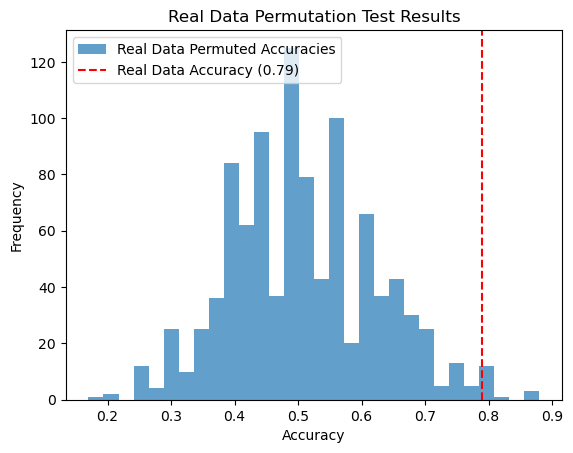

In [215]:
# Define the classifier
clf = SVC(kernel='rbf', C=1, gamma=0.0001)

# Stratified K-Fold cross-validation setup with random_state for reproducibility
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Real data permutation test
score_real, perm_scores_real, p_value_real = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000, random_state=0
)
print(f"Real Data - Permutation Test Score: {score_real}")
print(f"Real Data - P-value: {p_value_real}")

X_rand = np.random.permutation(X)  # Shuffle feature matrix

# Randomised data permutation test
score_rand, perm_scores_rand, p_value_rand = permutation_test_score(
    clf, X_rand, y, scoring="accuracy", cv=cv, n_permutations=1000, random_state=0
)
print(f"Randomized Data - Permutation Test Score: {score_rand}")
print(f"Randomized Data - P-value: {p_value_rand}")

# Plotting results
plt.hist(perm_scores_real, bins=30, alpha=0.7, label="Real Data Permuted Accuracies")
plt.axvline(score_real, color='red', linestyle='--', label=f"Real Data Accuracy ({score_real:.2f})")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Real Data Permutation Test Results")
plt.legend()
plt.show()


## PERMUTATION FEATURE IMPORTANCE 

In [ ]:
feature_names = X_test.columns

In [450]:

print("Calculating permutation importance...")
try:
    # Reduce repeats for testing, increase once it works
    r = permutation_importance(best_svc, X_test, y_test, n_repeats=10, random_state=0)

except Exception as e:
    print(f"An error occurred: {e}")


Calculating permutation importance...


In [365]:
print("Permutation importance calculated. Displaying results:")

# Iterate through sorted importances and display results
for i in r.importances_mean.argsort()[::-1]:  # Sort indices by importance descending
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"Retention Time: {feature_names[i]:<10.3f} "
              f"Mean Importance: {r.importances_mean[i]:.3f} "
              f"+/- {r.importances_std[i]:.3f}")


Permutation importance calculated. Displaying results:
Retention Time: 13.869     Mean Importance: 0.171 +/- 0.086
Retention Time: 22.811     Mean Importance: 0.171 +/- 0.086
Retention Time: 13.882     Mean Importance: 0.171 +/- 0.086
Retention Time: 13.876     Mean Importance: 0.171 +/- 0.086
Retention Time: 22.824     Mean Importance: 0.171 +/- 0.086
Retention Time: 22.817     Mean Importance: 0.171 +/- 0.086
Retention Time: 22.804     Mean Importance: 0.157 +/- 0.077
